# K-nearest neighbors (KNN)
K-nearest neighbors (KNN) is a simple, yet powerful, supervised machine learning algorithm used for classification and regression tasks. It's considered a non-parametric method because it doesn't make any assumptions about the underlying data distribution. Instead, it makes predictions based on the similarity of the input data points.

Here's how the KNN algorithm works:

1. **Training Phase**: The algorithm simply stores all the available data points and their corresponding labels (in the case of classification) or values (in the case of regression).

2. **Prediction Phase**:
   - For a given input data point, the algorithm calculates the distances between that point and all other points in the training dataset.
   - It then selects the K nearest data points (i.e., those with the smallest distances) to the input point.
   - For classification, it assigns the most common class among the K nearest neighbors to the input point.
   - For regression, it calculates the average (or weighted average) of the target values of the K nearest neighbors and assigns it as the predicted value for the input point.

The choice of K (the number of neighbors) is a crucial hyperparameter in the algorithm and can significantly impact the performance. Generally, larger values of K provide smoother decision boundaries, but may not capture local patterns well. Conversely, smaller values of K can capture local patterns but may be sensitive to noise.

KNN is computationally intensive during the prediction phase, especially with large datasets, as it requires calculating distances between the input point and all other points in the dataset. Additionally, it doesn't learn any explicit model during the training phase, making it less interpretable compared to some other algorithms. Despite these limitations, KNN is often used as a baseline algorithm due to its simplicity and effectiveness, especially with small to medium-sized datasets.

# Steps in KNN
KNN Algorithm:
Input:
  - Training dataset: X_train, y_train
  - Test instance: x_test
  - Number of neighbors: K

Output:
  - Predicted class label for x_test

Steps:
1. Compute the Euclidean distance between x_test and each instance in X_train.
2. Sort the distances in ascending order and select the top K instances with the smallest distances.
3. Retrieve the corresponding labels y_train for the selected K instances.
4. Assign the class label to x_test based on the majority class among the K neighbors.
   - For classification: Use majority voting to determine the class label.
   - For regression: Take the mean (or weighted mean) of the target values of the K neighbors.
5. Return the predicted class label for x_test.


In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.81


## Exercise
Use IRIS dataset and classify using KNN. Report precision, recall f1 and accuracy.

# Plot Nearest Neigbhors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic classification data
X, y = make_classification(n_samples=10, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Choose a single test data point for visualization
test_point = X_test[0]

# Get the indices of the nearest neighbors
distances, indices = knn.kneighbors([test_point])

# Plot the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', label='Training Data')

# Plot the test data point
plt.scatter(test_point[0], test_point[1], c='black', marker='x', s=100, label='Test Data')

# Plot the selected nearest neighbors
for neighbor_idx in indices[0]:
    plt.scatter(X_train[neighbor_idx][0], X_train[neighbor_idx][1], color='green', marker='^', s=100, alpha=0.5, label='Nearest Neighbors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Nearest Neighbors for Test Data Point')
plt.legend()
plt.grid(True)
plt.show()


## Effect of K in perfroamnce

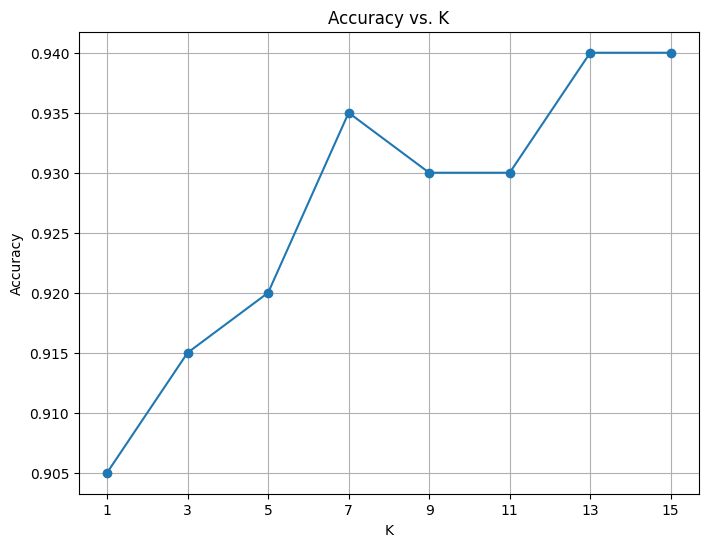

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different values of K to try
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Initialize lists to store accuracies
accuracies = []

for k in k_values:
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to list
    accuracies.append(accuracy)

# Plot accuracy vs. K
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()


## NOTE
The choice of K (the number of neighbors) is a crucial hyperparameter in the algorithm and can significantly impact the performance. Generally, larger values of K provide smoother decision boundaries, but may not capture local patterns well. Conversely, smaller values of K can capture local patterns but may be sensitive to noise

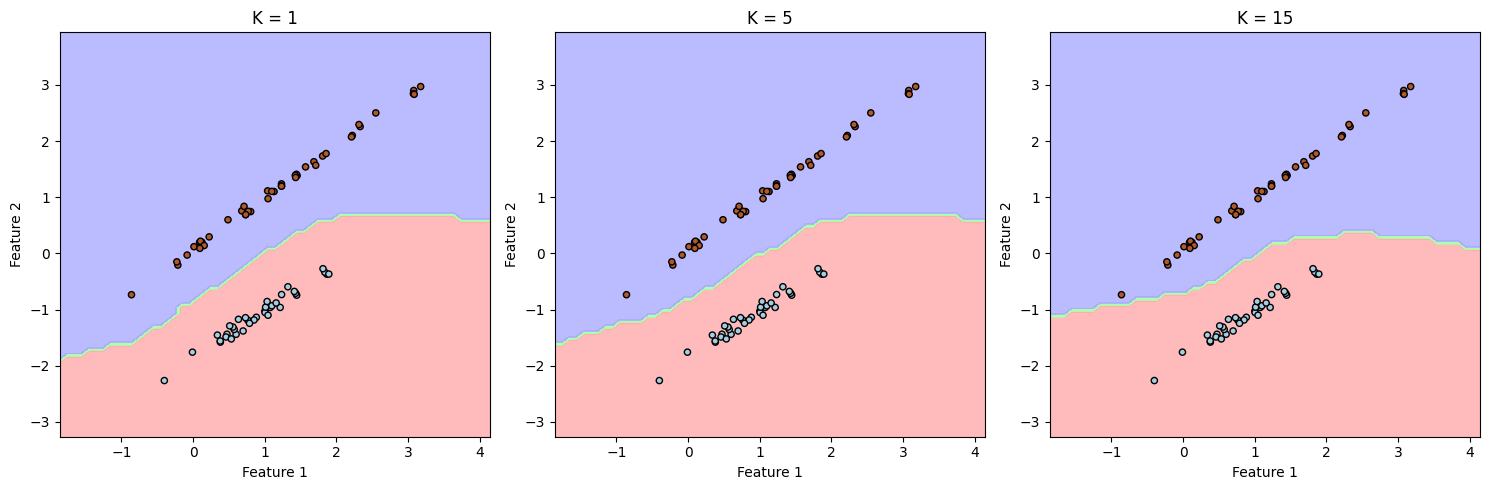

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Generate synthetic classification data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up meshgrid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Define different values of K to try
k_values = [1, 5, 15]

# Create subplots
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

# Iterate over different values of K
for i, k in enumerate(k_values):
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(X_train, y_train)

    # Predict on meshgrid points
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    axes[i].contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot training points
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k', s=20)

    axes[i].set_title(f'K = {k}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


# Effect of distance measure in KNN

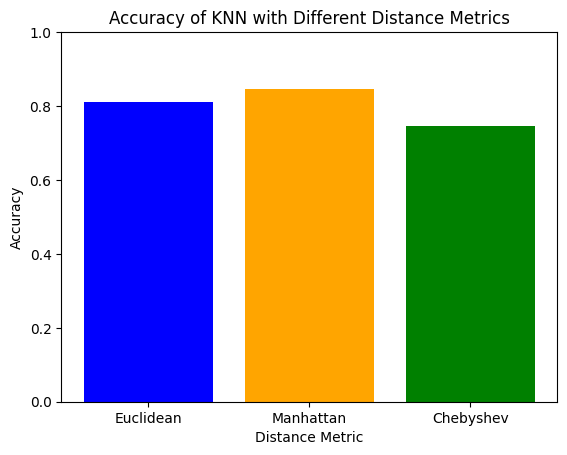

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifiers with different distance metrics
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_chebyshev = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')

# Train the classifiers
knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
knn_chebyshev.fit(X_train, y_train)

# Predict on the test set
y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)
y_pred_chebyshev = knn_chebyshev.predict(X_test)

# Calculate accuracies
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
accuracy_chebyshev = accuracy_score(y_test, y_pred_chebyshev)

# Plot the accuracies
labels = ['Euclidean', 'Manhattan', 'Chebyshev']
accuracies = [accuracy_euclidean, accuracy_manhattan, accuracy_chebyshev]

plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN with Different Distance Metrics')
plt.ylim(0, 1)
plt.show()


### User defined distnace measure in sklearn KNeighborsClassifier

In [15]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Custom distance function (Example: Minkowski with p=3)
def custom_distance(x1, x2):
    return np.sum(np.abs(x1 - x2) ** 3) ** (1/3)

# Define a sample dataset
X_train = np.array([[1, 2], [2, 3], [3, 4]])
y_train = np.array([0, 1, 0])

# Initialize KNeighborsClassifier with the custom distance function
knn_custom = KNeighborsClassifier(n_neighbors=1, metric=custom_distance)

# Train the classifier
knn_custom.fit(X_train, y_train)

# Predict using the trained classifier
# (Note: For prediction, the custom distance function is internally used)
y_pred = knn_custom.predict([[2, 2.5]])

print("Predicted class:", y_pred)


Predicted class: [1]


# Application of KNN
K-nearest neighbors (KNN) algorithm finds its application in various real-life scenarios across different domains. Here are some examples:

1. **Recommendation Systems**: KNN can be used in recommendation systems to suggest items to users based on similarity. For example, in movie recommendation systems, if a user likes certain movies, the system can recommend other movies that are highly rated by users who have similar preferences.

2. **Handwriting Recognition**: KNN can be applied to handwritten character recognition tasks. Given a new handwritten character, KNN can classify it by comparing it with a database of previously labeled characters and assigning the label of the majority of its nearest neighbors.

3. **Credit Scoring**: KNN can be used in credit scoring to determine the creditworthiness of an individual based on similar individuals' credit history. By analyzing features such as income, credit history, age, etc., KNN can identify individuals with similar profiles and predict their creditworthiness.

4. **Medical Diagnosis**: KNN can assist in medical diagnosis by predicting the disease or condition of a patient based on similar patients' medical records. For instance, given a set of symptoms, KNN can identify similar cases from historical medical data and predict the most likely diagnosis.

5. **Anomaly Detection**: KNN can be utilized in anomaly detection applications to identify outliers or unusual patterns in data. For example, in network security, KNN can detect abnormal network traffic by comparing it with normal traffic patterns.

6. **Text Classification**: KNN can classify text documents into predefined categories by considering the similarity between the documents. It can be used in applications such as spam detection, sentiment analysis, and topic classification.

7. **Customer Segmentation**: KNN can segment customers based on their purchasing behavior, demographic information, etc. By clustering similar customers together, businesses can tailor marketing strategies and product offerings to specific customer segments.

8. **Predictive Maintenance**: KNN can predict equipment failures or maintenance needs based on historical sensor data. By identifying patterns in sensor readings similar to those preceding failures, KNN can help schedule maintenance activities proactively, reducing downtime and maintenance costs.

These are just a few examples of how K-nearest neighbors algorithm can be applied in real-life scenarios across different domains. Its simplicity, interpretability, and effectiveness make it a versatile algorithm for various machine learning tasks.

## Handwriting Recognition

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the handwritten digits dataset
digits = load_digits()

# Split the data into features (X) and target labels (y)
X, y = digits.data, digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize some test samples and their predicted labels
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.set_title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()
